In [2]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [3]:
df = pd.read_csv(r'/content/Netflix.csv')
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


In [5]:
df.isnull().sum()


,0
index,0
id,0
title,0
type,0
description,5
release_year,0
age_certification,2285
runtime,0
imdb_id,0
imdb_score,0


In [6]:
df['age_certification'].fillna('No Data', inplace=True)


In [7]:
df.isnull().sum()

,0
index,0
id,0
title,0
type,0
description,5
release_year,0
age_certification,0
runtime,0
imdb_id,0
imdb_score,0


In [8]:
df['imdb_votes'].fillna(df['imdb_votes'].mean(), inplace=True)
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,No Data,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,No Data,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,No Data,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,No Data,116,tt10168094,6.2,9.0


In [9]:
type = df['type'].value_counts()
type

,count
type,
MOVIE,3407
SHOW,1876


In [10]:
df.drop(columns=['description', 'index', 'id', 'imdb_id'])

,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0
2,Life of Brian,MOVIE,1979,R,94,8.0,392419.0
3,The Exorcist,MOVIE,1973,R,133,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,1969,TV-14,30,8.8,72895.0
...,...,...,...,...,...,...,...
5278,Momshies! Your Soul is Mine,MOVIE,2021,No Data,108,5.8,26.0
5279,Fine Wine,MOVIE,2021,No Data,100,6.9,39.0
5280,Clash,MOVIE,2021,No Data,88,6.5,32.0
5281,Shadow Parties,MOVIE,2021,No Data,116,6.2,9.0


##Droped many columns like Description, index, id and imdb_id.

---



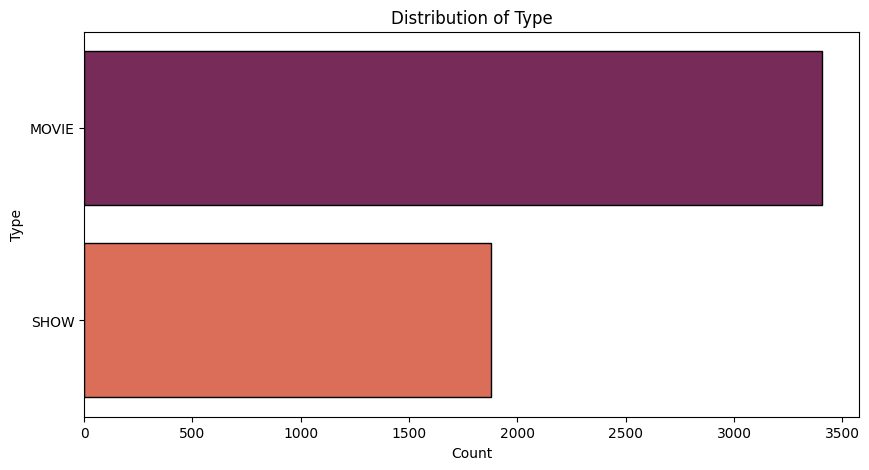

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'type', data = df, palette = "rocket", edgecolor = "black")
plt.ylabel("Type")
plt.xlabel("Count")
plt.title("Distribution of Type")
plt.show()

# The "MOVIE" category has a significantly higher count, around 3400, while "SHOW" has a lower count, around 2000. This suggests that there are more movies than shows in the dataset being analyzed. The chart uses different colors for each type, making the comparison clear and easy to interpret.

---





In [12]:
ac = df["age_certification"].value_counts()
ac

,count
age_certification,
No Data,2285
TV-MA,792
R,548
TV-14,436
PG-13,424
PG,238
TV-PG,172
G,105
TV-Y7,104


In [13]:
ac = df[df["age_certification"] != "No Data"]["age_certification"].value_counts()
ac

,count
age_certification,
TV-MA,792
R,548
TV-14,436
PG-13,424
PG,238
TV-PG,172
G,105
TV-Y7,104
TV-Y,94


Text(0.5, 1.0, 'Distribution of Age Certification')

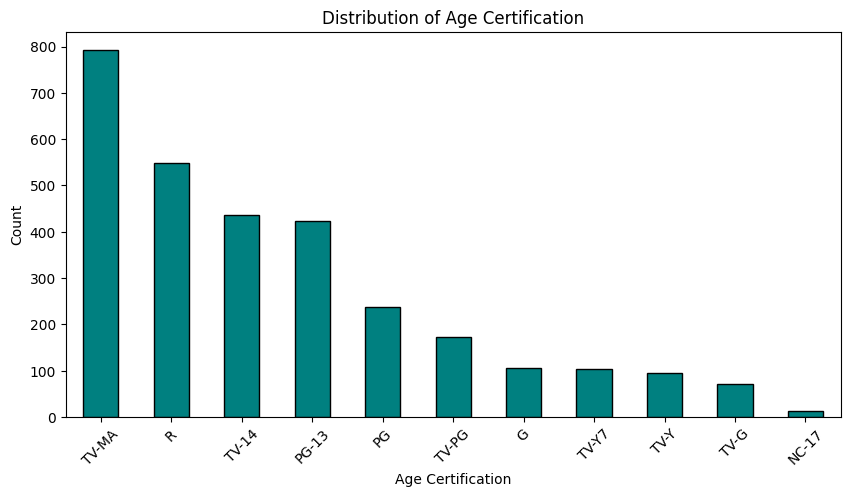

In [58]:
plt.figure(figsize=(10,5))
ac.plot(kind="bar", color = "teal", edgecolor = "black")
plt.xlabel("Age Certification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Distribution of Age Certification")

### This bar chart illustrates the distribution of content across various age certifications. The highest number of titles falls under the "TV-MA" category, with around 800 titles, followed by "R" with over 500 titles. "TV-14" and "PG-13" are also prominent, each with around 400 titles. The other age certifications, such as "PG," "TV-PG," "G," "TV-Y7," "TV-Y," "TV-G," and "NC-17," have significantly lower counts, with "NC-17" being almost negligible.The chart suggests that most content is geared toward mature audiences, while content suitable for younger viewers is much less frequent.

In [15]:
top5 = df.groupby("title")["imdb_score"].max().sort_values(ascending=False).head(10)
top5

,imdb_score
title,
#ABtalks,9.6
Khawatir,9.6
Breaking Bad,9.5
Avatar: The Last Airbender,9.3
Our Planet,9.3
Kota Factory,9.3
Who Rules The World,9.2
Reply 1988,9.2
My Mister,9.2


In [64]:
fig = px.bar(top5.reset_index(), y='title', x='imdb_score',
              labels={'title': 'Title', 'imdb_score': 'IMDB Score'},
              title='Top 10 Movies/TV Shows by IMDB Score',
              color_discrete_sequence = ["darkorange"])
fig.update_traces(marker_line_color='black', marker_line_width=1)
fig.show()


# **This bar graph shows the top 10 movies/TV shows based on their IMDB scores. The highest-rated show is "The Last Dance," followed by "My Mister" and "Reply 1988." The lowest-rated show on the list is "#ABtalks."**


---



In [17]:
rt = df.groupby("release_year")["type"].value_counts().unstack().fillna(0)
rt

type,MOVIE,SHOW
release_year,,
1953,1.0,0.0
1954,2.0,0.0
1956,1.0,0.0
1958,1.0,0.0
1959,1.0,0.0
...,...,...
2018,447.0,286.0
2019,469.0,280.0
2020,407.0,250.0


In [18]:
#Total movie/ show release over time
fig = px.line(rt.reset_index(), x="release_year",
              y=["MOVIE","SHOW"], title='Movie Releases Over Time',
              color_discrete_sequence = ["red","skyblue"])
fig.show()


# **The graph shows the number of movie and TV show releases over time from 1960 to 2020.Both movies and TV shows have seen a significant increase in releases over the past few decades.The number of releases reached a peak in the 2010s, particularly for TV shows. In recent years, there has been a slight decline in the number of movie releases, while TV show releases have remained relatively stable.Overall, the graph suggests a growing trend in content production, with TV shows becoming increasingly popular in recent years.**


---



In [19]:
least5 = df.groupby("title")["imdb_score"].max().sort_values(ascending=False).tail(10)
least5

,imdb_score
title,
Time to Dance,2.2
Hajwala: The Missing Engine,2.1
FRED 3: Camp Fred,2.0
Kyaa Kool Hain Hum 3,1.9
Racket Boys,1.8
Thomas & Friends: All Engines Go!,1.7
Himmatwala,1.7
Me Against You: Mr. S's Vendetta,1.7
He's Expecting,1.6


In [20]:
fig = px.bar(least5.reset_index(), y='title', x='imdb_score',
              labels={'title': 'Title', 'imdb_score': 'IMDB Score'},
              title='Least 10 Movies/TV Shows by IMDB Score',
           color_discrete_sequence = ["plum"])
fig.show()

## **The graph shows the least 10 movies/TV shows based on their IMDB scores. The lowest-rated show is "Time to Dance," followed by "Hajwala: The Missing Engine" and "FRED 3: Camp Fred." The highest-rated show on the list is "Me Against You: Mr. S's Vendetta."**


---



In [21]:
avg_imdb_by_age_cert = df[df['age_certification'] != "No Data"].groupby('age_certification')['imdb_score'].mean()
avg_imdb_by_age_cert

,imdb_score
age_certification,
G,6.393333
NC-17,6.400000
PG,6.208403
PG-13,6.444575
R,6.321168
TV-14,7.262615
TV-G,6.348611
TV-MA,7.065909
TV-PG,6.916860


In [22]:
fig = px.scatter(avg_imdb_by_age_cert.reset_index(), x='age_certification', y='imdb_score',
              labels={'age_certification': 'Age Certification', 'imdb_score': 'Average IMDB Score'},
              title='Average IMDB Score by Age Certification',
              color_discrete_sequence = ["tomato"])
fig.show()

##**The graph shows the average IMDB score for movies and TV shows based on their age certification.Movies rated NC-17 have the highest average IMDB score, followed by TV-MA. Movies rated G have the lowest average IMDB score, followed by PG-13.Overall, the graph suggests that while age certification can be a factor in determining the quality of a movie or TV show, it is not the sole determinant. Other factors, such as genre, director, and cast, also play a role in influencing ratings.**


---



In [23]:
avg_imdb_by_type = df.groupby('type')['imdb_score'].mean()
avg_imdb_by_type



,imdb_score
type,
MOVIE,6.266980
SHOW,7.017377


In [24]:
fig = px.bar(avg_imdb_by_type.reset_index(), x='type', y='imdb_score',
              labels={'type': 'Type', 'imdb_score': 'Average IMDB Score'},
              title='Average IMDB Score by Type',
              color_discrete_sequence = ["olive"])
fig.show()

# **The graph shows the average IMDB score for movies and TV shows.TV shows have a slightly higher average IMDB score compared to movies.The difference in average scores between movies and TV shows is relatively small, suggesting that both types of content can achieve high quality.Overall, the graph indicates a slight preference for TV shows among IMDB users, but the difference is not substantial.**


---



In [25]:
imdb_votes = df.groupby("imdb_votes")["title"].max().sort_values(ascending= True).head(10)
imdb_votes


,title
imdb_votes,
37199.0,#Alive
6283.0,#realityhigh
25077.0,0.03
1003.0,10 jours en or
3958.0,100 Humans: Life's Questions. Answered.
6167.0,100 Meters
796.0,11M
5530.0,122
282373.0,13 Reasons Why


In [26]:
fig = px.bar(imdb_votes.reset_index(), y='title', x='imdb_votes',
              labels={'title': 'Title', 'imdb_votes': 'IMDB Votes'},
              title='Top 10 Movies/TV Shows by IMDB Votes',
              color_discrete_sequence = ["deeppink"])
fig.show()

##**The graph shows the top 10 movies/TV shows based on the number of IMDB votes. The show with the most votes is "13 Reasons Why," followed by "122" and "11M." The show with the least votes is "#Alive."**


---



In [27]:
fig = px.scatter(df, x="imdb_score", y="title", color="type",
                 labels={"imdb_votes": "IMDB Votes", "title": "Title"},
                 title="IMDB Votes vs Title by Type",
              color_discrete_sequence= ["royalblue", "darkgoldenrod"])
fig.show()


##The graph shows the average IMDB score for movies and TV shows based on their age certification. Movies rated NC-17 have the highest average score, while movies rated G have the lowest. TV shows generally have higher average scores than movies. This suggests that age certification can be a factor in determining quality, but it's not the sole determinant.

---



In [28]:
run_age = df[df['age_certification'] != "No Data"].groupby('age_certification')['runtime'].mean()
run_age

,runtime
age_certification,
G,99.390476
NC-17,100.230769
PG,106.016807
PG-13,108.974057
R,106.136861
TV-14,41.176606
TV-G,26.055556
TV-MA,43.520202
TV-PG,35.366279


In [29]:
fig = px.bar(run_age.reset_index(), x = 'age_certification', y = 'runtime',
              color = "age_certification", labels = {"age_certification ": "Age Certification", "runtime": "Runtime"},
              title = "Age Certification by Runtime",
              color_discrete_sequence = ["darkviolet","deeppink","magenta","red","green","palegreen","deepskyblue","indianred","seagreen", "darkseagreen","coral"])
fig.show()

##**The graph shows the average runtime for movies and TV shows based on their age certification. Movies rated G and NC-17 generally have longer runtimes than other ratings. TV shows typically have shorter runtimes than movies, especially those rated TV-Y and TV-Y7. This suggests that age certification can influence the length of content.**


---



In [30]:
run_title = df.groupby('title')['runtime'].max().sort_values(ascending = False).head(10)
run_title

,runtime
title,
No Longer Kids,235
Once Upon a Time in America,229
A Lion in the House,225
Lagaan: Once Upon a Time in India,224
Jodhaa Akbar,213
Kabhi Khushi Kabhie Gham,210
The Irishman,209
Hum Aapke Hain Koun..!,206
Kabhi Alvida Naa Kehna,193


In [31]:
fig = px.scatter(run_title.reset_index(), y = 'title', x = 'runtime',
               labels = {"title ": "Title", "runtime": "Runtime"},
              title = "Top 10 Highest Runtime Title", color_discrete_sequence = ["darkolivegreen"])
fig.show()


##**The graph shows the top 10 longest movies based on runtime. The longest movie is "What's Your Raashee?", followed by "Kabhi Alvida Naa Kehna" and "Hum Aapke Hain Koun". Most of the movies on the list are from India, indicating a preference for longer films in the Indian film industry.**


---



In [56]:
df1 = df.groupby('title')['runtime'].max().sort_values(ascending = True).head(10)
df1

,runtime
title,
Buried by the Bernards,0
Masameer,0
Twogether,0
Metal Shop Masters,0
Dive Club,0
Larry Charles' Dangerous World of Comedy,0
Afronta!,0
Pili Fantasy: War of Dragons,0
Mighty Little Bheem: Kite Festival,0


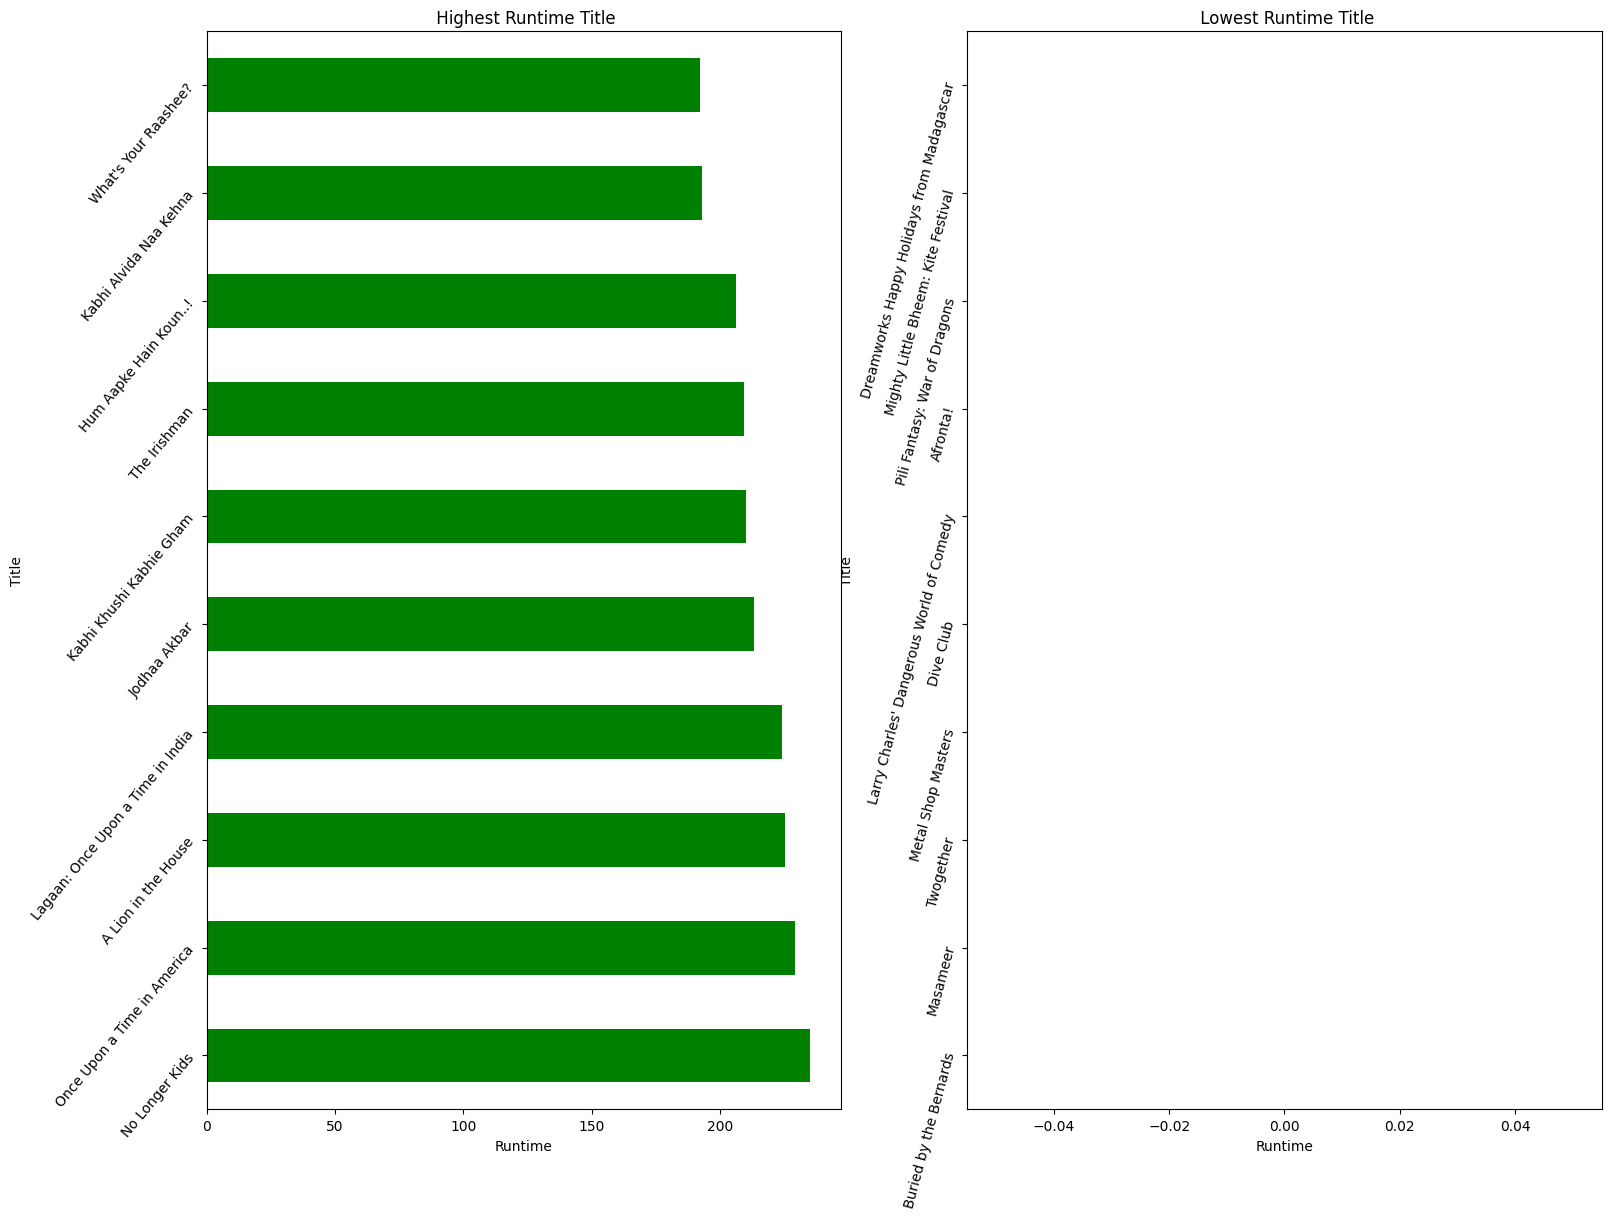

In [57]:
plt.figure(figsize=(18,14))
plt.subplot(1,2,2)
df1.plot(kind = "barh", x = "runtime", y = "title", fontsize = 10)
plt.xlabel("Runtime")
plt.yticks(rotation = 75)
plt.ylabel("Title")
plt.title(" Lowest Runtime Title")
plt.subplot(1,2,1)
run_title.plot(kind = "barh", x = "runtime", y = "title", color = "green")
plt.xlabel("Runtime")
plt.ylabel("Title")
plt.yticks(rotation = 50)
plt.title(" Highest Runtime Title")
plt.show()